In [1]:
import pandas as pd

df = pd.read_csv('BusinessGrantsbyNeighborhood.csv')
df.describe()

,Business Name,Neighborhood
count,1848,1848
unique,1841,23
top,Saigon One Restaurant,Dorchester
freq,2,306


In [11]:
df_count = df.groupby(["Neighborhood"], as_index=False).count().rename(columns={'Business Name':'BusinessCount'})
print(df_count)

                    Neighborhood  BusinessCount
0                        Allston             59
1                       Back Bay            187
2                    Beacon Hill             59
3                       Brighton             83
4                    Charlestown             44
5   Chinatown/Financial District             72
6                     Dorchester            306
7                       Downtown            105
8    Downtown/Financial District              1
9             Downtown/North End             44
10                   East Boston            121
11                Fenway/Kenmore             92
12                     Hyde Park             61
13                 Jamaica Plain            117
14                      Mattapan             31
15          Mission Hill/Roxbury             16
16                     North End             22
17                    Roslindale             85
18                       Roxbury             67
19                  South Boston        

In [12]:
df_count = df_count.drop(labels=[8,9], axis=0)

In [5]:
print(df_count)

                    Neighborhood  BusinessCount
0                        Allston             59
1                       Back Bay            187
2                    Beacon Hill             59
3                       Brighton             83
4                    Charlestown             44
5   Chinatown/Financial District             72
6                     Dorchester            306
7                       Downtown            105
10                   East Boston            121
11                Fenway/Kenmore             92
12                     Hyde Park             61
13                 Jamaica Plain            117
14                      Mattapan             31
15          Mission Hill/Roxbury             16
16                     North End             22
17                    Roslindale             85
18                       Roxbury             67
19                  South Boston             73
20       South Boston Waterfront             29
21                     South End        

In [13]:
population = [28621, 19588, 9336, 48330, 19120, 7143, 122191, 13451, 43066, 37733, 33009, 41012, 23834, 17886, 10805, 29386, 54905, 37917, 5579, 29373, 31561]
df_count["population"] = population

In [14]:
normalized = df_count["BusinessCount"]/df_count["population"]
df_count["normalized"] = normalized

In [15]:
print(df_count)

                    Neighborhood  BusinessCount  population  normalized
0                        Allston             59       28621    0.002061
1                       Back Bay            187       19588    0.009547
2                    Beacon Hill             59        9336    0.006320
3                       Brighton             83       48330    0.001717
4                    Charlestown             44       19120    0.002301
5   Chinatown/Financial District             72        7143    0.010080
6                     Dorchester            306      122191    0.002504
7                       Downtown            105       13451    0.007806
10                   East Boston            121       43066    0.002810
11                Fenway/Kenmore             92       37733    0.002438
12                     Hyde Park             61       33009    0.001848
13                 Jamaica Plain            117       41012    0.002853
14                      Mattapan             31       23834    0

<function matplotlib.pyplot.show(close=None, block=None)>

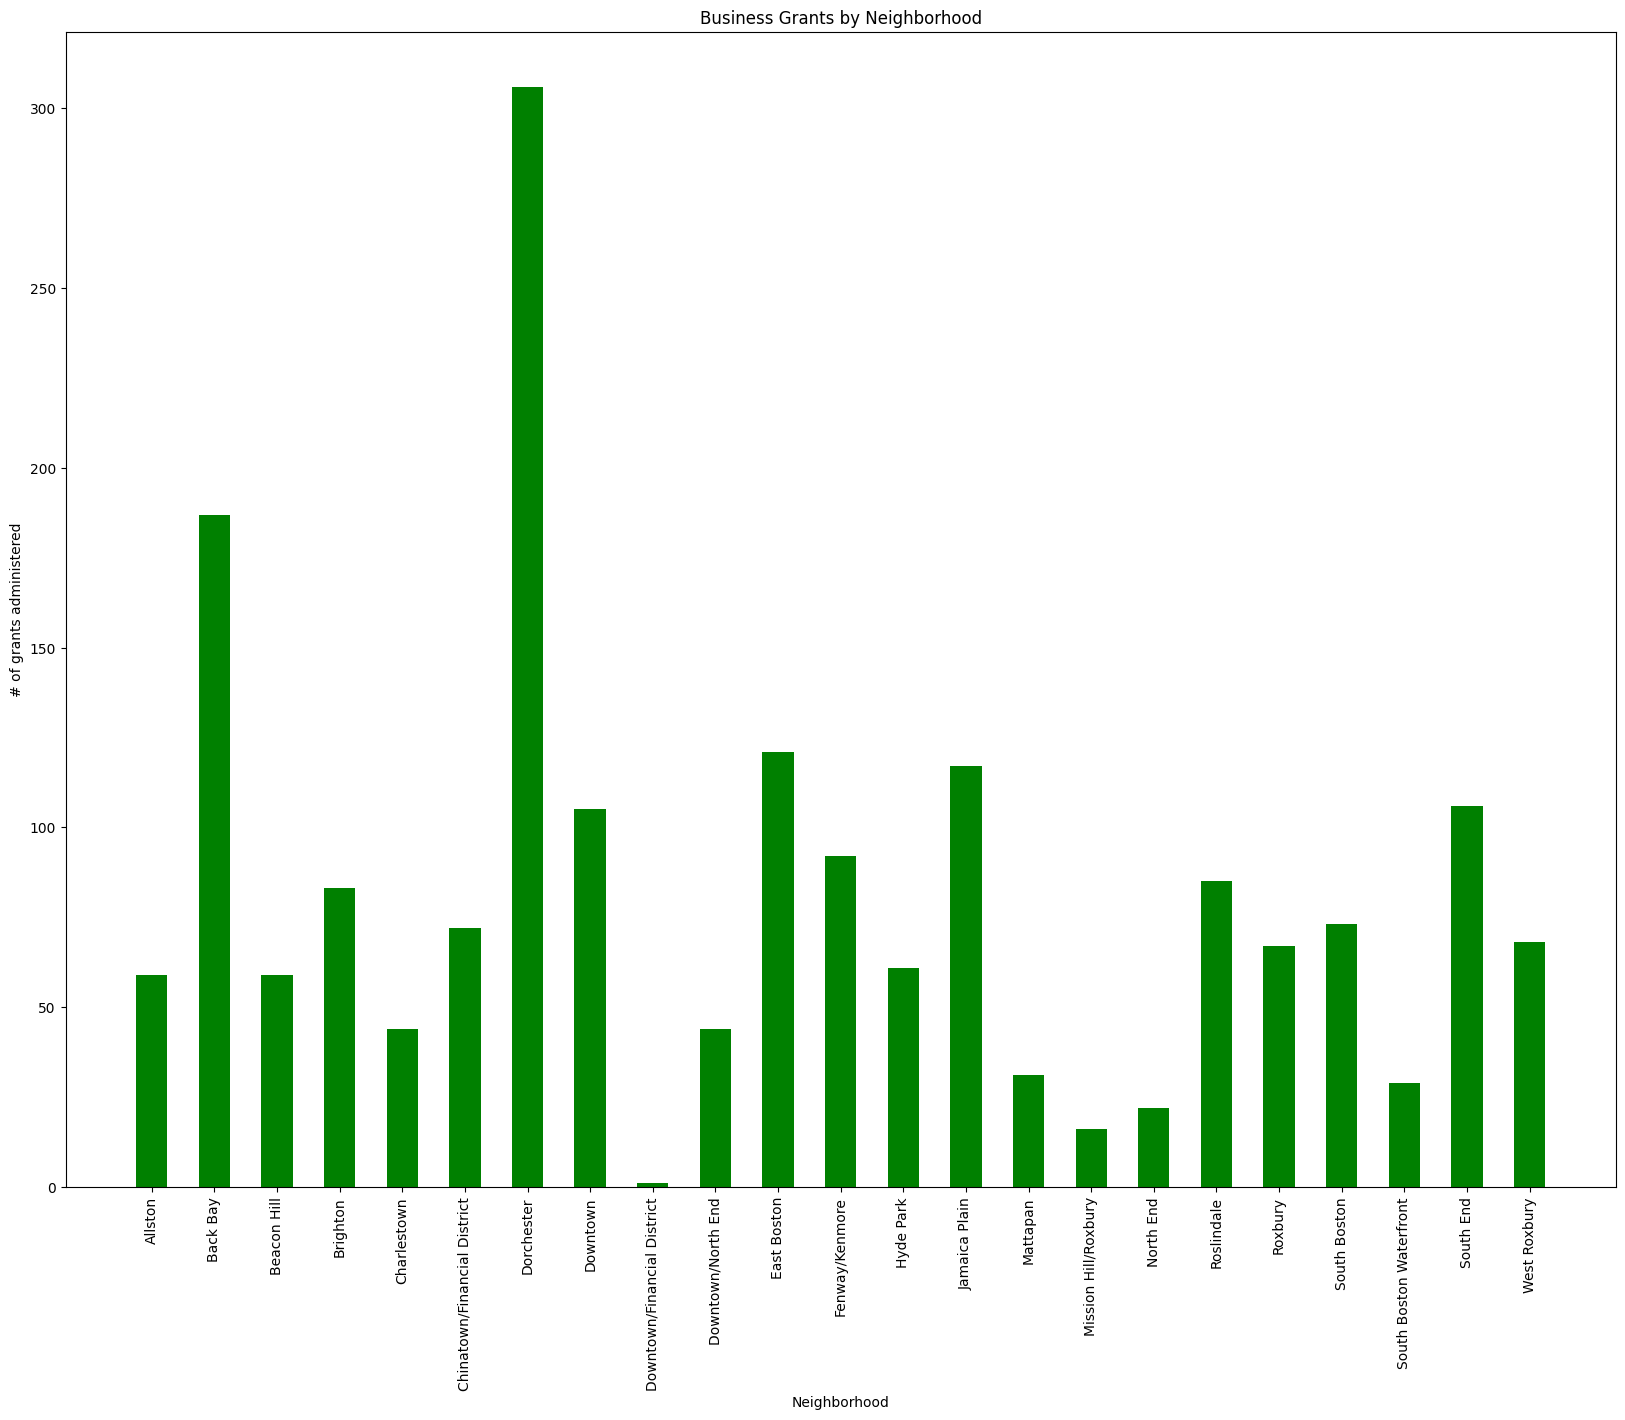

In [2]:
import numpy as np
import matplotlib.pyplot as plt

df_count = df.groupby(["Neighborhood"], as_index=False).count().rename(columns={'Business Name':'BusinessCount'})


XScale = df_count["Neighborhood"]
YScale = df_count["BusinessCount"]

fig = plt.figure(figsize = (20, 15))

plt.bar(XScale, YScale, color = "green", width = 0.5)
plt.xticks(rotation = 90)

plt.xlabel("Neighborhood")
plt.ylabel("# of grants administered")
plt.title("Business Grants by Neighborhood")

plt.show 

<function matplotlib.pyplot.show(close=None, block=None)>

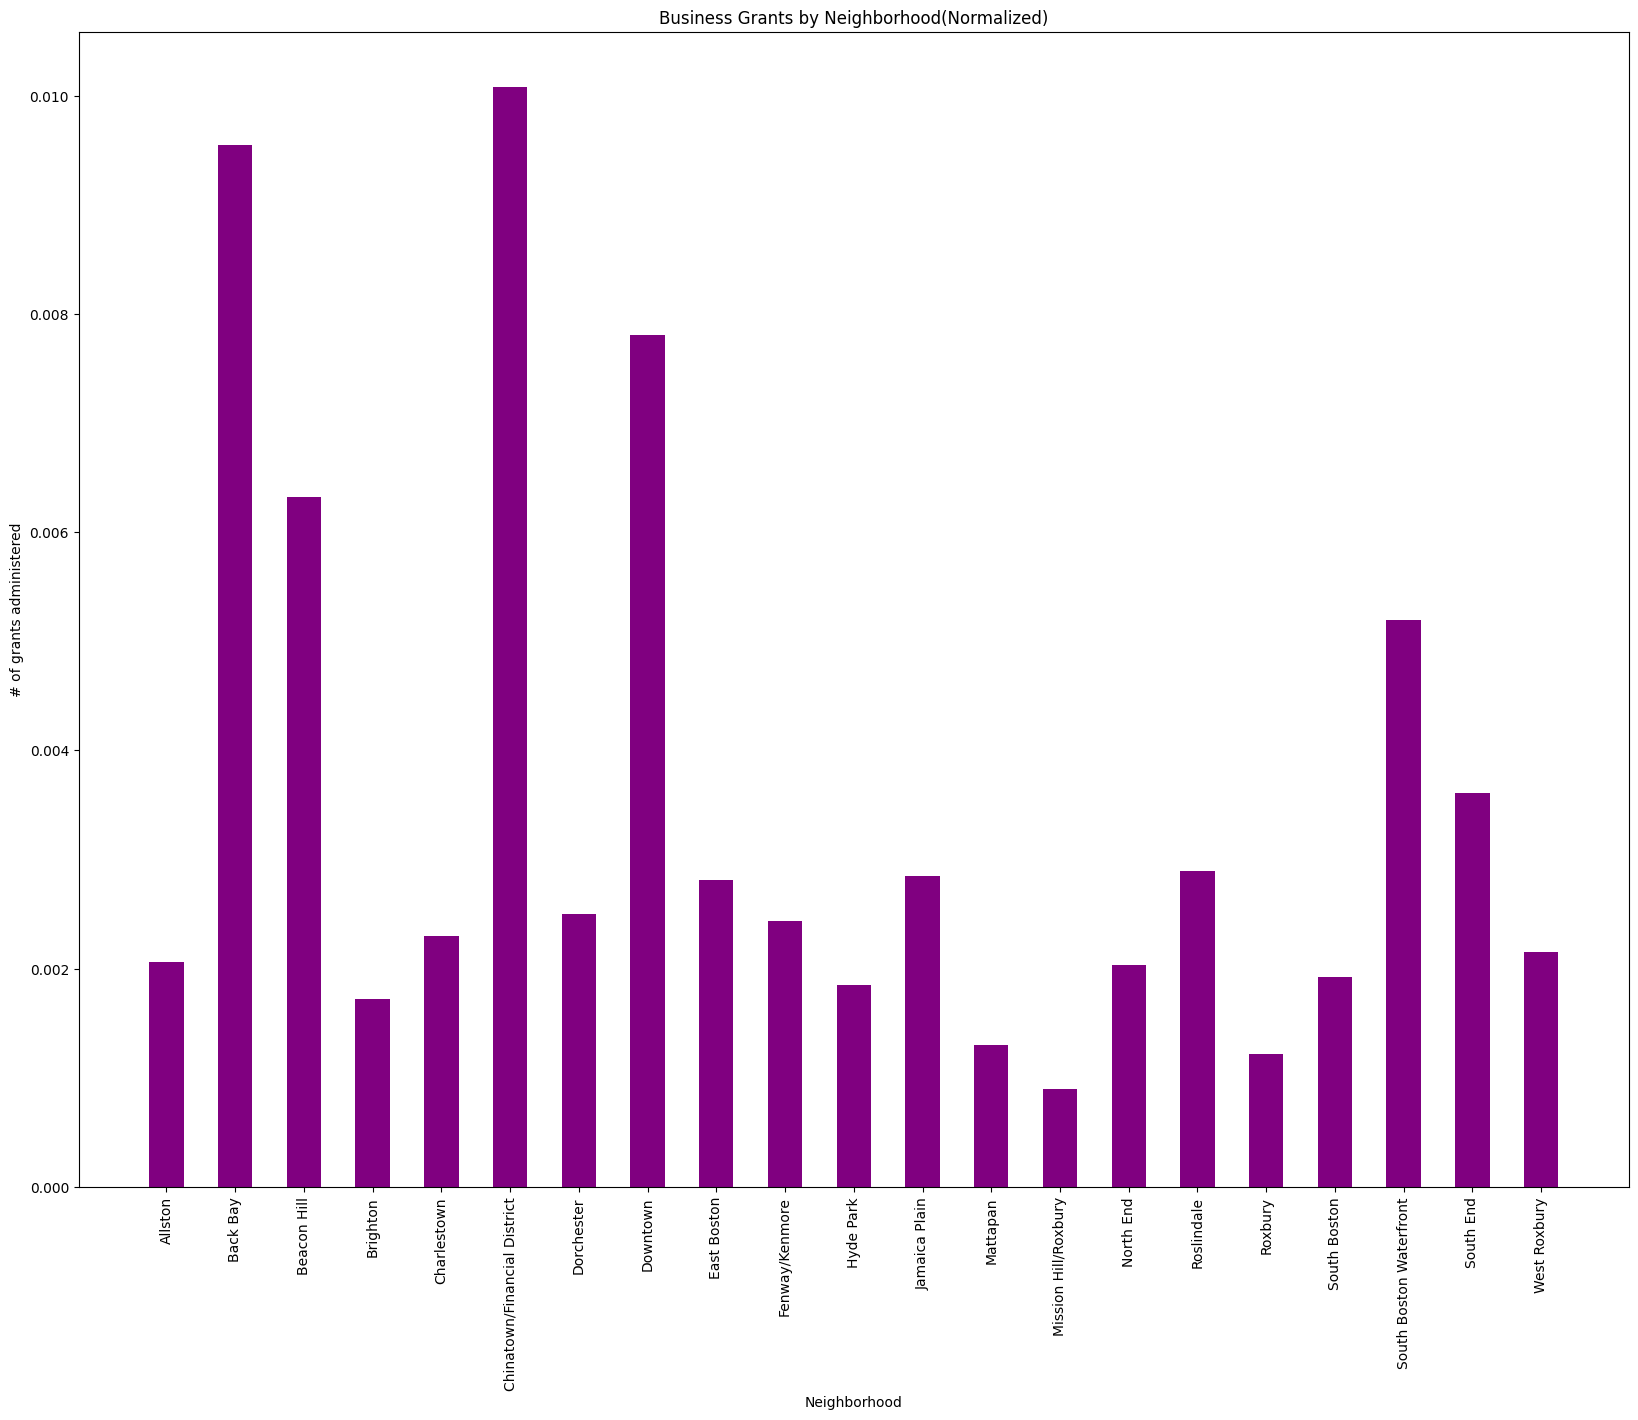

In [17]:
import numpy as np
import matplotlib.pyplot as plt



XScale = df_count["Neighborhood"]
YScale = df_count["normalized"]

fig = plt.figure(figsize = (20, 15))

plt.bar(XScale, YScale, color = "purple", width = 0.5)
plt.xticks(rotation = 90)

plt.xlabel("Neighborhood")
plt.ylabel("# of grants administered")
plt.title("Business Grants by Neighborhood(Normalized)")

plt.show 

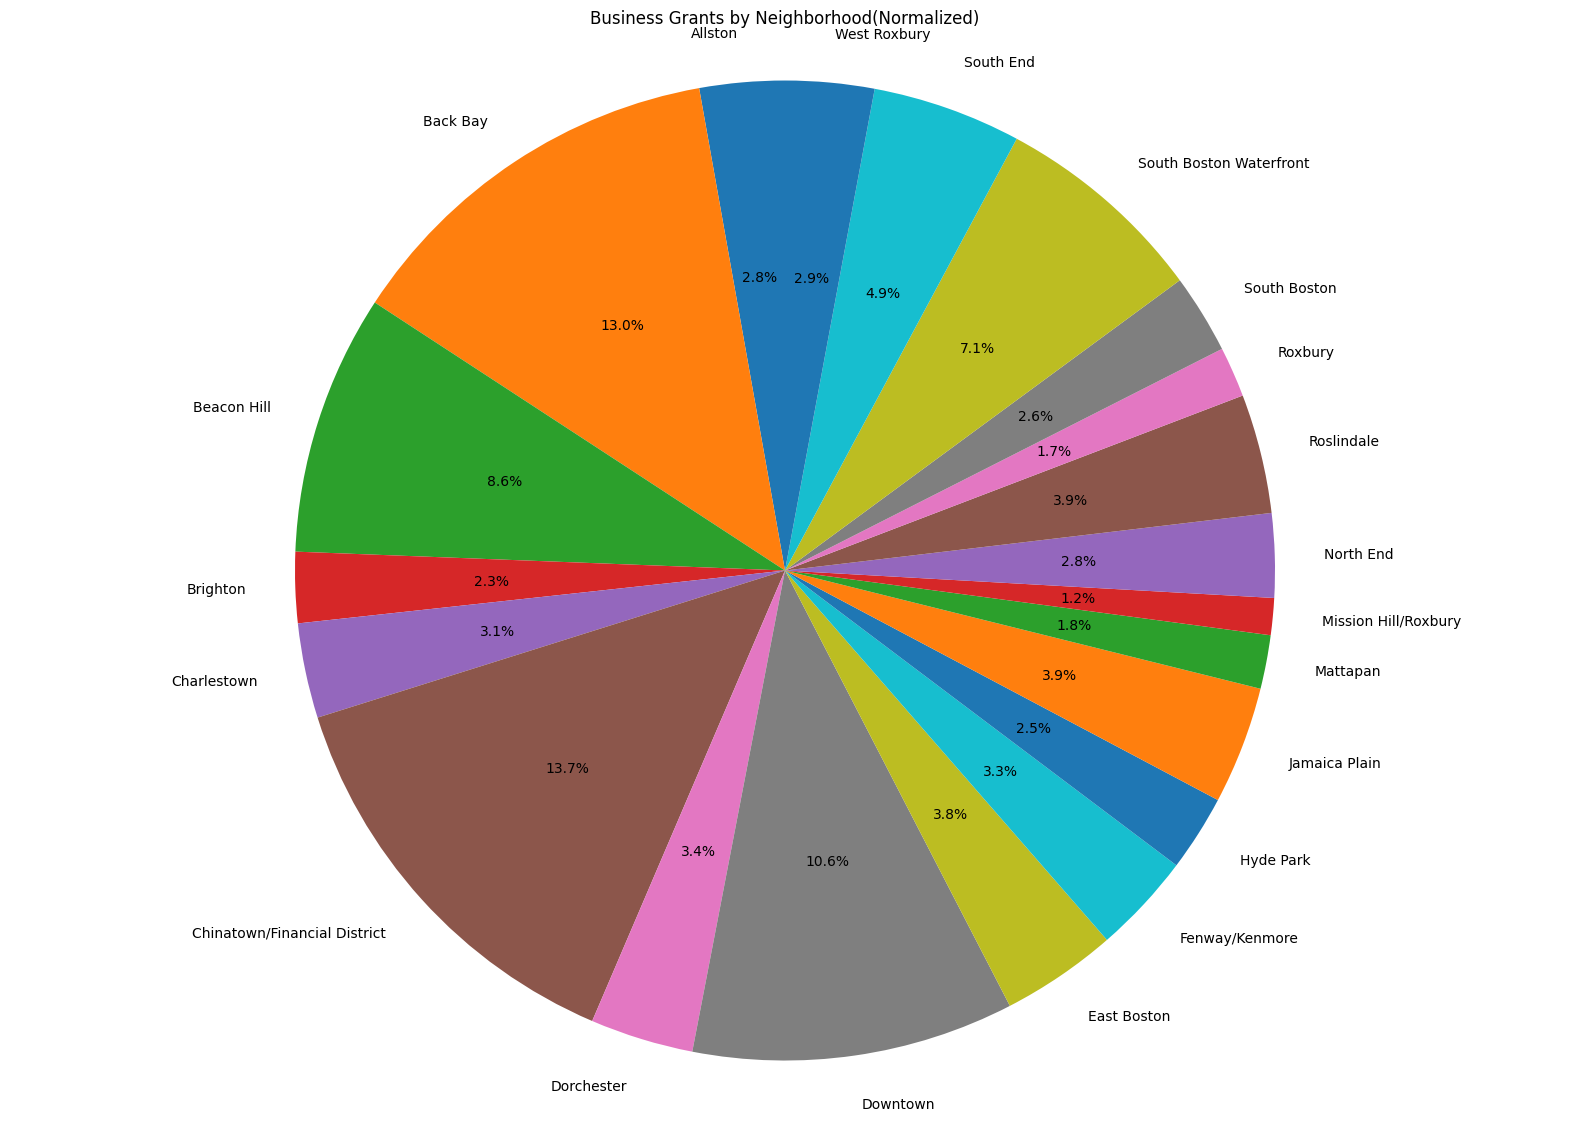

In [19]:
labels = df_count["Neighborhood"]
total_biz = df_count["normalized"].sum()
df_count["BusinessProp"] = df_count["normalized"]/total_biz
sizes = df_count["BusinessProp"]
df_count
#explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots(figsize =(20, 14))

ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.set_title("Business Grants by Neighborhood(Normalized)")

ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()